# Exercises

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`

In [1]:
import numpy as np
import pandas as pd


### 1. How likely is it that you roll doubles when rolling two dice?

In [2]:
rolls=np.random.choice([1,2, 3, 4,5, 6], size=(100_000, 2))
rolls

array([[2, 1],
       [1, 3],
       [6, 1],
       ...,
       [2, 6],
       [1, 2],
       [3, 2]])

In [3]:
df = pd.DataFrame(rolls)

In [4]:
def doubles(rolls):
    return rolls[0] == rolls[1].all()

pd.DataFrame(rolls).apply(doubles, axis = 1).mean()

0.16453

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [5]:
# Heads = 1, tails = 0
flips = np.random.choice([1, 0], size=(10_000, 8))
flips

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 0]])

In [6]:
sum_flips = flips.sum(axis = 1)

In [7]:
# If heads is exacly 3
(sum_flips == 3).mean()

0.2162

In [8]:
# If more than 3 heads
(sum_flips > 3).mean()

0.6371

### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [9]:
# 1 = data science, 0 = web dev
students = np.random.choice([1,0], p=[.25, .75], size=(10_000, 2))

In [10]:
sum_students = students.sum(axis = 1)
sum_students

array([1, 0, 0, ..., 1, 0, 0])

In [11]:
(sum_students == 2).mean()

0.0646

### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [12]:
# buy = 3, not buy = 0
snacks = np.round(np.random.normal(3, (1.5), (10_000, 5)))
snacks

array([[ 3.,  4.,  3.,  3.,  1.],
       [ 2.,  2., -0.,  4.,  3.],
       [ 2.,  5.,  3.,  0.,  3.],
       ...,
       [ 3.,  3.,  6.,  2.,  6.],
       [ 2.,  1.,  5.,  2.,  4.],
       [ 5.,  2.,  4.,  5.,  4.]])

In [13]:
p_snacks = snacks.sum(axis=1)
p_snacks

array([14., 11., 13., ..., 20., 14., 20.])

In [14]:
(p_snacks <= 16 ).mean()

0.6684

### 5. Compare Heights

* Men have an average height of 178 cm and standard deviation of 8cm.
* Women have a mean of 170, sd = 6cm.
* If a man and woman are chosen at random, P(woman taller than man)?

In [15]:
men = np.random.normal(178, (8), (10_000))
women = np.random.normal(170, (6), (10_000))
p_women = men < women
(p_women).mean()
    

0.2114

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

In [16]:
# download is corrupted = 0, not currupted = 1
downloads = np.random.choice([1,0], p=[249/250,1/250], size=(10_000, 50))

In [17]:
sum_downloads = downloads.sum(axis=1)

In [18]:
(sum_downloads == 50).mean()

0.8143

In [19]:
# If its 100 students
double_downloads = np.random.choice([1,0], p=[.996,0.004], size=(10_000, 100))

In [20]:
sum_doubles = double_downloads.sum(axis = 1)

In [21]:
(sum_doubles == 100).mean()

0.6685

#### What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [22]:
triple_downloads = np.random.choice([1,0], p=[.996,0.004], size=(10_000, 150))

In [23]:
sum_triples = triple_downloads.sum(axis=1) 

In [24]:
# 45% chance we observe an istallation issue
(sum_triples < 150).mean()

0.4565

#### How likely is it that 450 students all download anaconda without an issue?

In [25]:
all_students = np.random.choice([1,0], p=[.996,0.004], size=(10_000, 450))

In [26]:
sum_all = all_students.sum(axis=1)

In [27]:
(sum_all == 450).mean()

0.1648

### There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [28]:
# truck in park = 1, no truck = 0
trucks = np.random.choice([1,0], p=[.7, .3], size=(10_000, 3))

In [29]:
sum_trucks = trucks.sum(axis=1)
sum_trucks

array([2, 3, 3, ..., 2, 1, 1])

In [30]:
(sum_trucks == 0).mean()

0.0279

#### How likely is it that a food truck will show up sometime this week?

In [31]:
# truck in park = 1, no truck = 0
week_trucks = np.random.choice([1,0], p=[.7, .3], size=(10_000, 4))

In [32]:
sum_week = week_trucks.sum(axis=1)

In [33]:
(sum_week >= 1).mean()

0.992

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [58]:
# # 1 = matching birthday, 0 = not

# b_day = np.random.choice([1, 0], p=[(23/365), (365-23)/365], size=(100_000, 23))

# # Won't work
# (b_day.sum(axis=1) > 1).mean()

0.429

In [56]:
birthday = np.random.randint(1, 366, (10_000, 23))

(pd.DataFrame(birthday).nunique(axis=1) == 22).mean()

0.3612

In [36]:
birthday_40 = np.random.randint(1, 366, (10_000, 40))

(pd.DataFrame(birthday_40).nunique(axis=1) < 40).mean()

0.8922

# Simulating Chuck a Luck

## "Pay a Buck and Chuck-a-Luck" 

[Chuck-a-Luck](https://en.wikipedia.org/wiki/Chuck-a-luck) is a game of chance often associated with charity fundraisers or street gambling rather than casinos. 

To play, the House says, "Pay $1, pick a number and roll 3 dice. If any of those dice come up, you'll win 1, 2, or 3". 

> "It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2". 

You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:
- The player pays 1 to play and picks a number.
- The House rolls 3 dice at once.

- Payouts:
  - 3 if all three dice match the chosen number
  - 2 if exactly two dice match the chosen number
  - 1 is exactly one of the dice matches the chosen number
  - If none of the dice match the player's chosen number, then the House keeps the 1.

Exercises:
- If you play 1,000,000 games in a row, what are your winnings/losses?
- Chart out a histogram of all the outcomes of those 1,000,000 games
- Is this really a fair game of 1/6 + 1/6 + 1/6 odds?
- If you were to extrapolate the expected winnings per game, what would that number approach per game? 

In [37]:
lucky = np.random.choice([1,2,3,4,5,6], size=(100_000, 3))

In [38]:
winning_n = 3

lucky = pd.DataFrame(lucky)
lucky

,0,1,2
0,6,5,5
1,1,4,5
2,4,1,5
3,3,4,1
4,6,5,3
...,...,...,...
99995,2,6,6
99996,4,3,5
99997,6,3,1
99998,3,5,2


In [39]:
# Lets rename the columns

lucky["die1"] = lucky[0]
lucky["die2"] = lucky[1]
lucky["die3"] = lucky[2]
lucky = lucky[["die1", "die2", "die3"]]
lucky

,die1,die2,die3
0,6,5,5
1,1,4,5
2,4,1,5
3,3,4,1
4,6,5,3
...,...,...,...
99995,2,6,6
99996,4,3,5
99997,6,3,1
99998,3,5,2


In [40]:
prob = lucky[lucky == winning_n].count(axis=1)
prob

0        0
1        0
2        0
3        1
4        1
        ..
99995    0
99996    1
99997    1
99998    1
99999    0
Length: 100000, dtype: int64

In [41]:
count = prob.value_counts(normalize=True)
count

0    0.57929
1    0.34629
2    0.06984
3    0.00458
dtype: float64

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

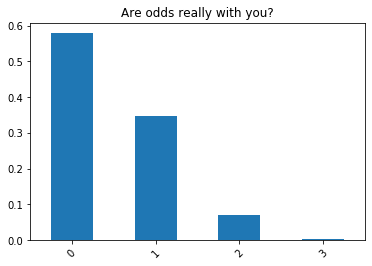

In [43]:
plt.title("Are odds really with you?")
count.plot.bar()
plt.xticks(rotation=45)

In [44]:
# Calculate winning
# Subtrack one from the original - because it costs one to play - so for you to win, 
# you need to stay positive with at least a +1, and the likelyhood of that happening, is:
((prob - 1) >= 1).mean()

0.07442

Let's use what we've learned to play a mage duel!

Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

### Exercises
Simulate mage duels to answer who is the more powerful mage?

- Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.
- Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?
- Do the results change much at 100 duels?
- Now, simulate 10,000 mage duels. Is there a clear winner?

In [45]:
# Assuming duels are not always to the death

n = 100_000


mage_1_health = np.random.choice([1,2,3,4], size=(n, 6))
mage_1_spell = np.random.choice([1,2,3,4], size=(n, 6))

mage_2_health = np.random.choice([1,2,3,4,5,6], size=(n, 4))
mage_2_spell = np.random.choice([1,2,3,4,5,6], size=(n, 4))

In [46]:
mage_1_survival = mage_1_health.sum(axis=1) - mage_2_spell.sum(axis=1)
(mage_1_survival > 0).mean()

0.5433

In [47]:
mage_2_survival = mage_2_health.sum(axis=1) - mage_1_spell.sum(axis=1)
(mage_2_survival > 0).mean()

0.3677

In [48]:
mage_1_health.sum()

1498584

In [49]:
# Assuming duels are to the death
n = 1
r = 10001



def roll_spell_1():
    mage_1_spell = np.random.choice([1,2,3,4], size=(n, 6))
    mage_1_spell_sum = mage_1_spell.sum()
    return mage_1_spell_sum
    
def roll_spell_2():
    mage_2_spell = np.random.choice([1,2,3,4,5,6], size=(n, 4))
    mage_2_spell_sum = mage_2_spell.sum()
    return mage_2_spell_sum
    

winner_mage_2 = 0
winner_mage_1 = 0
for i in range(1,r):
    mage_1_health = np.random.choice([1,2,3,4], size=(n, 6))
    mage_2_health = np.random.choice([1,2,3,4,5,6], size=(n, 4))
    
    mage_1_health = mage_1_health.sum()
    mage_2_health = mage_2_health.sum()
    
    dueling = True
    while dueling:
        
        spell_1 = roll_spell_1()
        spell_2 = roll_spell_2()
        flip_coin = np.random.choice([1,2], size =(1,1))
        if flip_coin == 1:
            mage_2_health = mage_2_health - spell_1
            if mage_2_health <= 0:
                winner_mage_1 += 1
                dueling = False
            mage_1_health = mage_1_health - spell_2
            if mage_1_health <= 0:
                winner_mage_2 += 1
                dueling = False
        else:
            mage_1_health = mage_1_health - spell_2
            if mage_1_health <= 0:
                winner_mage_2 += 1
                dueling = False
            mage_2_health = mage_2_health - spell_1
            if mage_2_health <= 0:
                winner_mage_1 += 1
                dueling = False
        
            
print(f"Mage 1 wins {winner_mage_1/r}")            
print(f"Mage 2 wins {winner_mage_2/r}")

      

Mage 1 wins 0.8323167683231677
Mage 2 wins 0.6596340365963403


In [50]:
flip_coin = np.random.choice([1,2], size =(1,1))
flip_coin

array([[2]])